<a href="https://colab.research.google.com/github/pattom72/other/blob/master/Zawal_serce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import seaborn as sns

from scipy import stats # test na normalność rozkładu
from sklearn.preprocessing import scale,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
from mlxtend.plotting import plot_confusion_matrix

In [34]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart (1).csv


In [0]:
serce = pd.read_csv('heart.csv')

In [36]:
serce.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [37]:
serce.shape

(303, 14)

In [38]:
nulls_summary = pd.DataFrame(serce.isnull().any(), columns=['Nulls'])
nulls_summary['Num_of_nulls [qty]'] = pd.DataFrame(serce.isnull().sum())
nulls_summary['Num_of_nulls [%]'] = round((serce.isnull().mean()*100),2)
print(nulls_summary)

          Nulls  Num_of_nulls [qty]  Num_of_nulls [%]
age       False                   0               0.0
sex       False                   0               0.0
cp        False                   0               0.0
trestbps  False                   0               0.0
chol      False                   0               0.0
fbs       False                   0               0.0
restecg   False                   0               0.0
thalach   False                   0               0.0
exang     False                   0               0.0
oldpeak   False                   0               0.0
slope     False                   0               0.0
ca        False                   0               0.0
thal      False                   0               0.0
target    False                   0               0.0


In [39]:
serce.skew()

age        -0.202463
sex        -0.791335
cp          0.484732
trestbps    0.713768
chol        1.143401
fbs         1.986652
restecg     0.162522
thalach    -0.537410
exang       0.742532
oldpeak     1.269720
slope      -0.508316
ca          1.310422
thal       -0.476722
target     -0.179821
dtype: float64

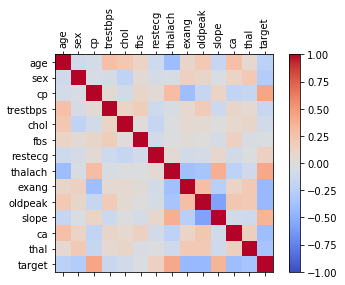

<Figure size 7200x7200 with 0 Axes>

In [40]:
corr = serce.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)

ticks = np.arange(0,len(serce.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(serce.columns)
ax.set_yticklabels(serce.columns)
plt.figure(figsize=(100,100))
plt.show()

age             (8.74798581312778, 0.012600826063683705)
sex          (947.845992573034, 1.5061140700832218e-206)
cp           (168.43868174733004, 2.654636057423714e-37)
trestbps     (28.567604502994023, 6.260708761946876e-07)
chol          (83.50370500964404, 7.368869203474054e-19)
fbs          (111.74408896317725, 5.433496466822932e-25)
restecg      (673.9636558637226, 4.473543116954668e-147)
thalach       (13.46672289054534, 0.0011905243421222172)
exang                           (7230.661508434152, 0.0)
oldpeak       (66.6201580770229, 3.4167757949760942e-15)
slope       (22.444059802777566, 1.3376248799032395e-05)
ca            (61.78525877193141, 3.832670872706147e-14)
thal            (12.0186071759252, 0.002455797832205547)
target                         (1445.2136592053423, 0.0)
dtype: object

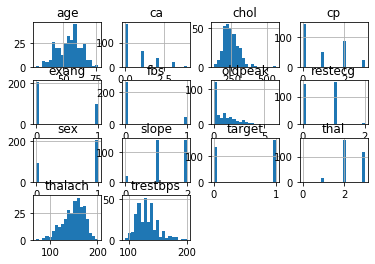

In [41]:
serce.hist(bins=20) # histogram dla wszystkich zmiennych

serce.select_dtypes([float, int]).apply(stats.normaltest) # p-value to wartość 

In [42]:
#sprawdzam gdzie występują wartości odstające
Q_first = serce.quantile(0.25)
Q_third = serce.quantile(0.75)
iqr = Q_third-Q_first
low_boundary = (Q_first - 1.5 * iqr)
upp_boundary = (Q_third + 1.5 * iqr)
num_of_outliers_L = (serce[iqr.index] < low_boundary).sum()
num_of_outliers_U = (serce[iqr.index] > upp_boundary).sum()
wartosci_odstajace = pd.DataFrame({'niska_granica':low_boundary, 'wysoka_granica':upp_boundary,\
                         'wartosci_odstajace_L':num_of_outliers_L, 'wartosci_odstajace_U':num_of_outliers_U}) 
wartosci_odstajace

,niska_granica,wysoka_granica,wartosci_odstajace_L,wartosci_odstajace_U
age,27.25,81.25,0,0
sex,-1.50,2.50,0,0
cp,-3.00,5.00,0,0
trestbps,90.00,170.00,0,9
chol,115.75,369.75,0,5
fbs,0.00,0.00,0,45
restecg,-1.50,2.50,0,0
thalach,84.75,214.75,1,0
exang,-1.50,2.50,0,0
oldpeak,-2.40,4.00,0,5


In [43]:
# zależności pomiędzy zmiennymi

# Przypadek A - nie występują wartosci odstające, rozkład normalny.
np.corrcoef(serce.select_dtypes(['float', 'int']), rowvar=0)
# Przypadek B - mogą występować obserwacje odstające, dowolny rozklad.
stats.spearmanr(serce.select_dtypes(['float', 'int']))[0]

array([[ 1.        , -0.09913088, -0.08749412,  0.28561681,  0.19578599,
         0.11397832, -0.13276876, -0.39805244,  0.0896786 ,  0.26829122,
        -0.18404841,  0.34095479,  0.08725391, -0.23840007],
       [-0.09913088,  1.        , -0.06204094, -0.05294119, -0.15134205,
         0.04503179, -0.04838909, -0.03986798,  0.14166381,  0.10071533,
        -0.02501041,  0.11936769,  0.25082085, -0.28093658],
       [-0.08749412, -0.06204094,  1.        ,  0.03541319, -0.09172085,
         0.08977463,  0.06563997,  0.32401302, -0.41825595, -0.1614491 ,
         0.15947787, -0.21600615, -0.20784032,  0.46086018],
       [ 0.28561681, -0.05294119,  0.03541319,  1.        ,  0.12656163,
         0.15198393, -0.12584121, -0.04040735,  0.05291815,  0.15426674,
        -0.08656953,  0.09013959,  0.05967277, -0.12159275],
       [ 0.19578599, -0.15134205, -0.09172085,  0.12656163,  1.        ,
         0.01846298, -0.16193312, -0.04676639,  0.09151399,  0.0452596 ,
        -0.01255073,  0.11

In [44]:
serce.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [0]:
#standaryzacja - i chyba nie ma potrzeby
serce_st = serce
#scaler = StandardScaler()
#serce_st[['trestbps', 'chol','thalach','oldpeak']] = scaler.fit_transform(serce_st[['trestbps', 'chol','thalach','oldpeak']])

In [46]:
serce_st.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


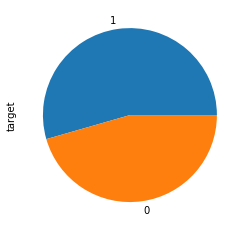

In [47]:
serce_st.target.value_counts().plot(kind='pie')

In [48]:
data = serce_st.copy()
target = data.pop('target')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [49]:
target.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [50]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

print(f'X_train shape {X_train.shape}')
print(f'y_train shape {y_train.shape}')
print(f'X_test shape {X_test.shape}')
print(f'y_test shape {y_test.shape}')
print(f'\nTest ratio: {len(X_test) / len(data):.2f}')
print(f'\ny_train:\n{y_train.value_counts()}')
print(f'\ny_test:\n{y_test.value_counts()}')

X_train shape (227, 13)
y_train shape (227,)
X_test shape (76, 13)
y_test shape (76,)

Test ratio: 0.25

y_train:
1    124
0    103
Name: target, dtype: int64

y_test:
1    41
0    35
Name: target, dtype: int64


In [51]:
#test_size=0.3 - dane testowe 30%
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=42)

print(f'X_train shape {X_train.shape}')
print(f'y_train shape {y_train.shape}')
print(f'X_test shape {X_test.shape}')
print(f'y_test shape {y_test.shape}')
print(f'\nTest ratio: {len(X_test) / len(data):.2f}')
print(f'\ny_train:\n{y_train.value_counts()}')
print(f'\ny_test:\n{y_test.value_counts()}')

X_train shape (212, 13)
y_train shape (212,)
X_test shape (91, 13)
y_test shape (91,)

Test ratio: 0.30

y_train:
1    115
0     97
Name: target, dtype: int64

y_test:
1    50
0    41
Name: target, dtype: int64


In [52]:
#target, train_size=0.9 - dane treningowe
X_train, X_test, y_train, y_test = train_test_split(data, target, train_size=0.9, random_state=42)

print(f'X_train shape {X_train.shape}')
print(f'y_train shape {y_train.shape}')
print(f'X_test shape {X_test.shape}')
print(f'y_test shape {y_test.shape}')
print(f'\nTest ratio: {len(X_test) / len(data):.2f}')
print(f'\ny_train:\n{y_train.value_counts()}')
print(f'\ny_test:\n{y_test.value_counts()}')

X_train shape (272, 13)
y_train shape (272,)
X_test shape (31, 13)
y_test shape (31,)

Test ratio: 0.10

y_train:
1    148
0    124
Name: target, dtype: int64

y_test:
1    17
0    14
Name: target, dtype: int64


In [53]:
#stratify - równy podział ze względu na zmienną docelową
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42, test_size=0.1, stratify=target)

print(f'X_train shape {X_train.shape}')
print(f'y_train shape {y_train.shape}')
print(f'X_test shape {X_test.shape}')
print(f'y_test shape {y_test.shape}')
print(f'\nTest ratio: {len(X_test) / len(data):.2f}')
print(f'\ny_train:\n{y_train.value_counts()}')
print(f'\ny_test:\n{y_test.value_counts()}')

X_train shape (272, 13)
y_train shape (272,)
X_test shape (31, 13)
y_test shape (31,)

Test ratio: 0.10

y_train:
1    148
0    124
Name: target, dtype: int64

y_test:
1    17
0    14
Name: target, dtype: int64


In [54]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=40, test_size=0.25, stratify=target)

print(f'X_train shape {X_train.shape}')
print(f'y_train shape {y_train.shape}')
print(f'X_test shape {X_test.shape}')
print(f'y_test shape {y_test.shape}')
print(f'\nTest ratio: {len(X_test) / len(data):.2f}')
print(f'\ntarget:\n{target.value_counts() / len(target)}')
print(f'\ny_train:\n{y_train.value_counts() / len(y_train)}')
print(f'\ny_test:\n{y_test.value_counts() / len(y_test)}')

X_train shape (227, 13)
y_train shape (227,)
X_test shape (76, 13)
y_test shape (76,)

Test ratio: 0.25

target:
1    0.544554
0    0.455446
Name: target, dtype: float64

y_train:
1    0.546256
0    0.453744
Name: target, dtype: float64

y_test:
1    0.539474
0    0.460526
Name: target, dtype: float64


In [55]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
y_pred = log_reg.predict(X_test)
y_pred[:30]

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1])

In [57]:
y_prob = log_reg.predict_proba(X_test)
y_prob[:30]

array([[0.99600356, 0.00399644],
       [0.08289979, 0.91710021],
       [0.9386624 , 0.0613376 ],
       [0.08823208, 0.91176792],
       [0.02651956, 0.97348044],
       [0.71702397, 0.28297603],
       [0.87534728, 0.12465272],
       [0.17923449, 0.82076551],
       [0.11789408, 0.88210592],
       [0.46300039, 0.53699961],
       [0.81093832, 0.18906168],
       [0.37078529, 0.62921471],
       [0.82505634, 0.17494366],
       [0.15684134, 0.84315866],
       [0.32588364, 0.67411636],
       [0.98224273, 0.01775727],
       [0.02435026, 0.97564974],
       [0.05289373, 0.94710627],
       [0.13117266, 0.86882734],
       [0.10638433, 0.89361567],
       [0.98697416, 0.01302584],
       [0.01776768, 0.98223232],
       [0.91616464, 0.08383536],
       [0.0717515 , 0.9282485 ],
       [0.15552489, 0.84447511],
       [0.19664802, 0.80335198],
       [0.03926614, 0.96073386],
       [0.79909214, 0.20090786],
       [0.99299356, 0.00700644],
       [0.28529333, 0.71470667]])

Accuracy: 0.881578947368421


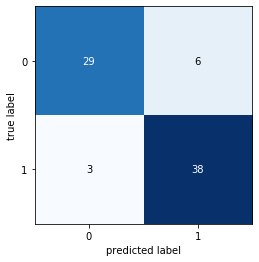

In [58]:

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

In [59]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87        35
           1       0.86      0.93      0.89        41

    accuracy                           0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76



In [60]:
def plot_confusion_matrix(cm):
    # klasyfikacja binarna
    cm = cm[::-1]
    cm = pd.DataFrame(cm, columns=['pred_0', 'pred_1'], index=['true_1', 'true_0'])

    fig = ff.create_annotated_heatmap(z=cm.values, x=list(cm.columns), y=list(cm.index), 
                                      colorscale='ice', showscale=True, reversescale=True)
    fig.update_layout(width=500, height=500, title='Confusion Matrix', font_size=16)
    fig.show()

plot_confusion_matrix(cm)